<a href="https://colab.research.google.com/github/agateknik/AIforCyberSecurity/blob/main/Try_Workbook_Email_Spam_Detection_system_using_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem Explanation

## Explanation
The problem at hand involves classifying messages as either "spam" or "ham" (non-spam). This is a classic example of a binary classification task, where we aim to train a machine learning model that can automatically sort incoming messages based on their content. The significance of solving this problem lies in various applications, such as email filtering systems, SMS spam detection, and maintaining the integrity of messaging platforms.

Spam messages are often unsolicited and can contain phishing links, scams, or unwanted advertisements. Being able to filter these out can save users time and protect them from potential threats. On the other hand, ham messages are regular, non-spam messages that are important to the user. It's crucial that the system has a high accuracy in classifying spam to avoid false positives, which could result in important messages being mistakenly labeled as spam.



```
# Pseudocode for a classification decision
if message_contains_spam_keywords(message):
    classify_as_spam()
else:
    classify_as_ham()
```

The pseudocode above represents a very simplified logic that a spam filter might use, where a message is classified as spam if it contains certain keywords. This is not how modern classifiers work, but it gives a beginner an idea of the decision-making process involved in classification. The actual implementation will use a machine learning algorithm to learn from data which messages are spam or ham.

Next, we'll move on to the Dataset Exploration step. Let's load the dataset you've provided and start exploring it to understand its structure.


# 2. Importing Libraries

To work with our dataset and eventually apply the KNN algorithm, we need to import several libraries:

- numpy: Provides support for efficient numerical operations.
- pandas: Essential for data manipulation and analysis.
- matplotlib and seaborn: Used for data visualization.
- sklearn: This is the library that contains a variety of machine learning algorithms, including KNN, as well as utilities for data preprocessing, model evaluation, etc.







In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Dataset Exploration

Link to dataset: https://www.kaggle.com/datasets/venky73/spam-mails-dataset/data

The dataset we are working with is structured as a CSV file with 5171 entries, each representing an email message. It contains the following columns:


In [ ]:
data = pd.read_csv("spam_ham_dataset.csv")


- **unnamed**: an index or identifier for each message.

- **label**: This is a string indicating whether the message is 'spam' or 'ham'

- **text**: The content of the email message

- **label_num**: A numerical representation of the label column, where '0' corresponds to 'ham' and '1' corresponds to 'spam'


    For our machine learning task, the text column will serve as the feature (input), while label_num will be the target (output) we want our model to predict.

In [ ]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


# 4. Data Analysis
Explanation
In this section, we'll take a closer look at our dataset to understand the distribution of classes (spam vs. ham), identify any patterns or anomalies, and prepare the data for the machine learning model. This will involve statistical analysis, visualization, and preprocessing.

We'll start by visualizing the distribution of spam and ham messages in the dataset, and then we'll perform some basic text analysis. Let's begin with the distribution of classes.

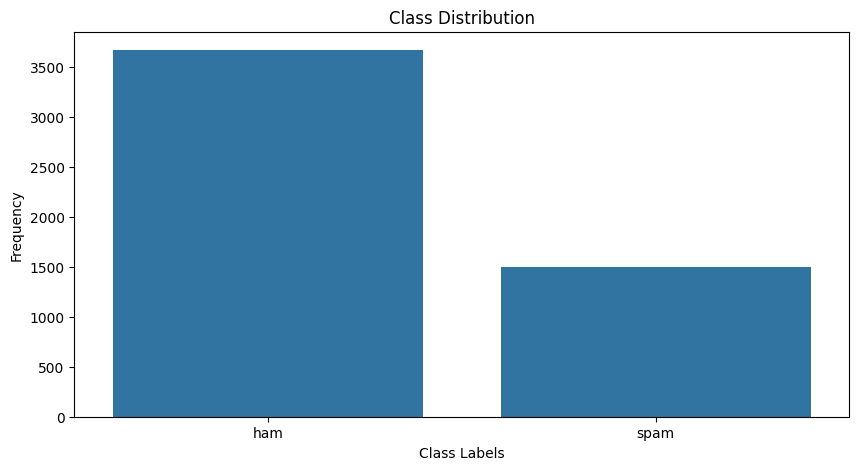

In [ ]:
# Class Balance Analysis
class_counts = data['label'].value_counts()

# Plot the class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.ylabel('Frequency')
plt.xlabel('Class Labels')
plt.show()

The bar plot above illustrates the distribution of spam and ham messages within our dataset. From this visualization, we can observe whether there's a significant imbalance between the two classes.

Based on the plot, it looks like there are more ham messages than spam messages, which is typical in real-world scenarios where legitimate messages usually outnumber spam. It's important to consider this imbalance when training our machine learning model, as it may lead to a model that's biased towards predicting the majority class. To address this, we might explore techniques such as resampling the dataset, using different evaluation metrics, or adjusting the class weights in the machine learning algorithm.



## Word Frequency Analysis:



In [ ]:
from collections import Counter

In [ ]:
data[data['label'] == "ham"] ['text']

,text
0,Subject: enron methanol ; meter # : 988291\r\n...
1,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
4,Subject: re : indian springs\r\nthis deal is t...
5,Subject: ehronline web address change\r\nthis ...
...,...
5165,"Subject: fw : crosstex energy , driscoll ranch..."
5166,Subject: put the 10 on the ft\r\nthe transport...
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,Subject: calpine daily gas nomination\r\n>\r\n...


In [ ]:
def get_most_common_words(class_label, num_words, column_name, dataset):

  text = " ".join(message for message in dataset[dataset['label'] == class_label][column_name])
  words = text.split()
  return Counter(words).most_common(num_words)

In [ ]:
get_most_common_words("spam", 10, "text", data)

[('.', 19489),
 (',', 11227),
 ('-', 7941),
 ('the', 7254),
 ('/', 5707),
 ('to', 5160),
 ('and', 4903),
 (':', 4612),
 ('of', 4490),
 ('a', 3787)]

For ham messages, the most common items are often punctuation marks and common English words, along with some email-specific terms like 'ect' (possibly a truncated version of 'etcetera' or a specific term) and 'enron'.

For spam messages, again punctuation marks and common English words are frequent, but there are also indicators of spam content such as exclamation marks and sales or urgency-related words like 'free', '!', and '?'.

## Text Length Analysis

In [ ]:
len("this is a spam email")

20

In [ ]:
data['text_lenght'] = data['text'].apply(len)

In [ ]:
data.groupby("label")['text_lenght'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,3672.0,977.008170,1382.827493,18.0,231.75,530.0,1227.25,32258.0
spam,1499.0,1223.256171,1825.986210,11.0,283.00,576.0,1253.50,22073.0


In [ ]:
data.head()

,Unnamed: 0,label,text,label_num,text_lenght
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


The descriptive statistics for the length of messages in each class show that spam messages tend to be slightly longer on average compared to ham messages. However, both types of messages have a wide range of lengths, as indicated by the standard deviation and the maximum length.

Ham messages have a mean length of 977 characters and a maximum length of 32,258 characters.
Spam messages have a mean length of 1223 characters and a maximum length of 22,073 characters.

## Cleaning punctuation and most common words

In [ ]:
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [ ]:
def preprocess_text(text):
  text = text.lower()

  text = text.translate(str.maketrans("", "", string.punctuation))
  words = text.split()
  words = [word for word in words if word not in ENGLISH_STOP_WORDS]

  return " ".join(words)

In [ ]:
data['text'].values[0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [ ]:
preprocess_text(data['text'].values[0])

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminary flow data provided daren override pop s daily volume presently zero reflect daily activity obtain gas control change needed asap economics purposes'

In [ ]:
data['cleaned_text'] = data['text'].apply(preprocess_text)

In [ ]:
data.head()

,Unnamed: 0,label,text,label_num,text_lenght,cleaned_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,subject hpl nom january 9 2001 attached file h...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,subject neon retreat ho ho ho wonderful time y...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,subject photoshop windows office cheap main tr...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,subject indian springs deal book teco pvr reve...


In [ ]:
get_most_common_words("spam", 10, "cleaned_text", data)

[('subject', 1657),
 ('s', 1316),
 ('3', 1239),
 ('com', 992),
 ('http', 983),
 ('2', 858),
 ('company', 728),
 ('1', 720),
 ('0', 698),
 ('e', 631)]

# 5. Selected ML Algorithm Tutorial: K-Nearest Neighbors (KNN)


The K-Nearest Neighbors (KNN) algorithm is a simple, yet effective machine learning algorithm used for classification and regression tasks. In the context of our spam detection problem, we will be using it for classification. KNN works on the principle of feature similarity: a new instance is classified by a majority vote of its neighbors, with the instance being assigned to the class most common among its
k nearest neighbors.

For KNN to work with text data, we first need to convert the text into a set of numerical features. This is typically done using techniques like Bag of Words or TF-IDF. We will use the Bag of Words model, which involves the following steps:

1. Tokenization: Splitting text into individual words.
2. Vocabulary Building: Creating a vocabulary of all the unique words in the dataset.
3. Encoding: Transforming each text into a numerical vector based on the vocabulary.


The value of k (the number of neighbors to consider) is a hyperparameter that can be tuned. A small value for k can make the algorithm sensitive to noise in the data, while a large value makes it computationally expensive and may include features that are less relevant.

In [ ]:
data['cleaned_text']

,cleaned_text
0,subject enron methanol meter 988291 follow not...
1,subject hpl nom january 9 2001 attached file h...
2,subject neon retreat ho ho ho wonderful time y...
3,subject photoshop windows office cheap main tr...
4,subject indian springs deal book teco pvr reve...
...,...
5166,subject 10 ft transport volumes decreased 2500...
5167,subject 3 4 2000 following noms hpl t extra 15...
5168,subject calpine daily gas nomination julie men...
5169,subject industrial worksheets august 2000 acti...


TEXT VECTORIZED

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
X = vectorizer.fit_transform(data['cleaned_text'])

In [ ]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 338374 stored elements and shape (5171, 50179)>

In [ ]:
y = data["label_num"]

In [ ]:
y

,label_num
0,0
1,0
2,0
3,1
4,0
...,...
5166,0
5167,0
5168,0
5169,0


The transformation of the text data into numerical vectors has resulted in a sparse matrix X with 5171 rows, which corresponds to the number of messages, and 50179 columns, each representing a unique word in the vocabulary created from our dataset.

With the text data now in a format suitable for machine learning, we are ready to proceed to the next step where we will train and test the KNN classifier.

# 6. Training and Testing the System

To train and test our KNN model, we'll follow these steps:

- Split the Data: Divide the dataset into a training set and a testing set. This allows us to train the model on one set of data and then test it on a separate set to evaluate its performance.
- Initialize the KNN Classifier: Choose a value for
k and initialize the classifier.
- Train the Classifier: Fit the classifier to the training data.
- Test the Classifier: Use the trained classifier to predict the labels of the testing data.
- Evaluate Performance: Compare the predicted labels to the true labels of the testing set to evaluate the model.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(4136, 50179)

In [ ]:
X_test.shape

(1035, 50179)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
preds = knn.predict(X_test)

In [ ]:
sum(y_test.values == preds) / len(preds)

np.float64(0.8270531400966183)

# 7. Creating an OpenAI ChatGPT Version of the System

To create a version of our spam detection system using OpenAI's ChatGPT, we would utilize the OpenAI API to send messages to the model and receive predictions on whether a message is spam or ham. This approach would involve setting up an API call that passes the message text to ChatGPT, which has been fine-tuned on a diverse range of internet text and can perform tasks like text classification when prompted correctly.

There are some caveats to consider:

- OpenAI's models, including ChatGPT, are not specialized for spam detection out of the box and may require fine-tuning on a specific spam detection dataset to achieve optimal performance.
- The API usage comes with associated costs and latency that depend on the number of requests made and the computational resources required for processing.
- The API's performance would depend on the quality and format of the prompts given to the model.

In [ ]:
#!pip install openai

In [ ]:
import openai
from google.colab import userdata
import os
from openai import OpenAI


os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
openai = OpenAI()

In [ ]:
def classify_message(message):

  response = openai.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[
          {"role": "system", "content": "Act as a spam detection algoritm for email classification task.\
            Classify given mail into spam/no spam:"},
          {"role": "user", "content": message}
                ]
  )

  return response.choices[0].message.content

In [ ]:
classify_message("Free money !!! Click here to claim your prize.")

'This email is classified as spam.'

In [ ]:
#model GPT to data text
classify_message(data['text'].values[15])

'This is a spam email.'

In [ ]:
data['label_num'].values[15]

np.int64(1)

# 8. Comparing Two Systems Together
Explanation
When comparing the performance of our KNN model to that of an OpenAI ChatGPT-based system, we would consider several factors:

- Accuracy: How often does each system correctly identify spam and ham? We can compare the accuracy scores directly if we have equivalent testing data for both systems.
- Scalability: KNN can be computationally expensive as it needs to compute the distance between the input and each training sample. ChatGPT's response time would depend on network latency and server load.
- Cost: Running predictions with KNN is free once the model is trained, but using OpenAI's API can incur costs depending on the number of API calls and the computational resources used.
- Maintainability: Updating the KNN model with new data requires retraining, whereas ChatGPT can potentially adapt to new examples with more sophisticated fine-tuning approaches, assuming OpenAI provides such an interface.
- User Experience: If the system is part of a product, the latency from an API call to OpenAI might affect user experience compared to a locally-run KNN model.

In [ ]:
# prompt: buat perbanding accuracy model dengan GPT dan KNN dari dataset diatas

# Evaluating the accuracy of the OpenAI ChatGPT model
def get_gpt_prediction(message):
  try:
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "Act as a spam detection algorithm for email classification task.\
              Classify given mail into 'spam' or 'ham' (no spam). Respond only with 'spam' or 'ham'."},
            {"role": "user", "content": message}
                  ]
    )
    return 1 if response.choices[0].message.content.lower() == 'spam' else 0
  except Exception as e:
    print(f"Error during GPT classification: {e}")
    return -1 # Indicate an error

# Classify a sample of the test set using the GPT model
# Due to API costs and potential rate limits, we'll evaluate on a smaller subset of the test data
sample_size = 100 # Adjust the sample size as needed
X_test_sample = X_test[:sample_size]
y_test_sample = y_test[:sample_size]
text_test_sample = data.loc[y_test_sample.index, 'text'].values

gpt_preds_sample = []
for message in text_test_sample:
  gpt_preds_sample.append(get_gpt_prediction(message))

# Filter out potential errors (-1)
valid_gpt_preds = [pred for pred in gpt_preds_sample if pred != -1]
valid_y_test_sample = [y_test_sample.values[i] for i, pred in enumerate(gpt_preds_sample) if pred != -1]

# Calculate accuracy for the GPT model on the sample
if len(valid_gpt_preds) > 0:
  gpt_accuracy = sum(valid_y_test_sample == valid_gpt_preds) / len(valid_gpt_preds)
  print(f"GPT Model Accuracy on Sample: {gpt_accuracy:.4f}")
else:
  print("No valid GPT predictions were obtained.")


# Calculate accuracy for the KNN model on the same sample for fair comparison
knn_preds_sample = knn.predict(X_test_sample)
knn_accuracy_sample = sum(y_test_sample.values == knn_preds_sample) / len(knn_preds_sample)
print(f"KNN Model Accuracy on Sample: {knn_accuracy_sample:.4f}")

# Calculate accuracy for the KNN model on the full test set (as already done)
knn_accuracy_full = sum(y_test.values == preds) / len(preds)
print(f"KNN Model Accuracy on Full Test Set: {knn_accuracy_full:.4f}")

# Comparison and Summary
print("\n--- Model Comparison ---")
print(f"KNN Model Accuracy (on sample): {knn_accuracy_sample:.4f}")
if len(valid_gpt_preds) > 0:
  print(f"GPT Model Accuracy (on sample): {gpt_accuracy:.4f}")
else:
  print("GPT Model accuracy could not be calculated.")

print("\nFactors to Consider:")
print("- Accuracy: Compare the calculated accuracy values.")
print("- Scalability: KNN is faster for prediction after training; GPT depends on API calls.")
print("- Cost: KNN is free after training; GPT incurs API costs per usage.")
print("- Data Requirements: KNN requires labeled data for training; GPT can potentially perform with zero-shot/few-shot learning but fine-tuning improves performance.")
print("- Interpretability: KNN is generally more interpretable than large language models like GPT.")


TypeError: 'bool' object is not iterable